In [ ]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

In [1]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: [2025AA05525]
Name: [Santhosh N]
Email: [2025AA05525_cnn_assignment.ipynb]
Date: [08-02-2026]

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: [2025AA05525]\nName: [Santhosh N]\nEmail: [2025AA05525_cnn_assignment.ipynb]\nDate: [08-02-2026]\n\n================================================================================\n'

In [ ]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for 
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT: 
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

In [ ]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import json

np.random.seed(42)
tf.random.set_seed(42)


Deep learning frameworks (choose Keras or PyTorch)

In [ ]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

In [3]:
# Generate synthetic time series data
n_samples = 1500
t = np.arange(n_samples)
data = np.sin(0.02 * t) + 0.5 * np.sin(0.05 * t)

df = pd.DataFrame({"value": data})
df.head()


,value
0,0.000000
1,0.044988
2,0.089906
3,0.134683
4,0.179249


1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [4]:
train_ratio = 0.9
split_idx = int(len(df) * train_ratio)

train_data = df.iloc[:split_idx]
test_data  = df.iloc[split_idx:]


In [5]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled  = scaler.transform(test_data)


In [6]:
SEQ_LENGTH = 20
HORIZON = 1

def create_sequences(data, seq_length, horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - horizon + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+horizon])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, SEQ_LENGTH, HORIZON)
X_test,  y_test  = create_sequences(test_scaled, SEQ_LENGTH, HORIZON)


In [7]:
# REQUIRED: Fill in these metadata fields
dataset_name = "Synthetic Sine Wave Time Series"
dataset_source = "Programmatically generated using NumPy (sinusoidal signal)"
n_samples = 1500            # Total number of time steps
n_features = 1              # Univariate time series
sequence_length = 20        # Lookback window (within 10–50)
prediction_horizon = 1      # Forecast 1 step ahead (within 1–10)
problem_type = "time_series_forecasting"


In [9]:
# Primary metric selection
primary_metric = "TODO: MAE OR RMSE OR MAPE"
metric_justification = """
RMSE is chosen as the primary metric because it penalizes larger prediction errors
more heavily than MAE, making it suitable for evaluating forecasting accuracy
in time series where large deviations are critical.
"""

In [10]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Synthetic Sine Wave Time Series
Source: Programmatically generated using NumPy (sinusoidal signal)
Total Samples: 1500
Number of Features: 1
Sequence Length: 20
Prediction Horizon: 1
Primary Metric: TODO: MAE OR RMSE OR MAPE
Metric Justification: 
RMSE is chosen as the primary metric because it penalizes larger prediction errors
more heavily than MAE, making it suitable for evaluating forecasting accuracy
in time series where large deviations are critical.



1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

1.3 Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def preprocess_timeseries(data):
    """
    Preprocess time series data
    
    Args:
        data: raw time series data (NumPy array or Pandas Series/DataFrame)
    
    Returns:
        preprocessed_data, scaler
    """
    # Convert to NumPy array
    data = np.asarray(data).reshape(-1, 1)

    # Handle missing values (forward fill, then backward fill if needed)
    if np.isnan(data).any():
        data = np.nan_to_num(data, nan=np.nanmean(data))

    # Normalize data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled, scaler


In [12]:
import numpy as np

def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction
    
    Args:
        data: preprocessed time series data (NumPy array)
        seq_length: lookback window
        pred_horizon: forecast steps ahead
    
    Returns:
        X: input sequences (samples, seq_length, features)
        y: target values (samples, pred_horizon)
    """
    X, y = [], []

    for i in range(len(data) - seq_length - pred_horizon + 1):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length : i + seq_length + pred_horizon])

    return np.array(X), np.array(y)


TODO: Preprocess data
TODO: Create sequences

In [13]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_test_ratio = "90/10"

# Total raw samples
total_samples = 1500

# Train/test split (temporal)
train_raw_samples = int(total_samples * 0.9)   # 1350
test_raw_samples  = total_samples - train_raw_samples  # 150

# Number of sequences created
train_samples = train_raw_samples - sequence_length - prediction_horizon + 1  # 1330
test_samples  = test_raw_samples  - sequence_length - prediction_horizon + 1  # 130


In [14]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 1330
Test Samples: 130
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [ ]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.optimizers import Adam

def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model
    
    Args:
        model_type: string ('LSTM' or 'GRU')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon
    
    Returns:
        model: compiled RNN model
    """
    assert model_type in ["LSTM", "GRU"], "model_type must be 'LSTM' or 'GRU'"
    assert n_layers >= 2, "RNN must have at least 2 stacked layers"

    model = Sequential()
    model.add(Input(shape=input_shape))

    # First recurrent layer
    if model_type == "LSTM":
        model.add(LSTM(hidden_units, return_sequences=True))
    else:
        model.add(GRU(hidden_units, return_sequences=True))

    # Middle layers (if any)
    for _ in range(n_layers - 2):
        if model_type == "LSTM":
            model.add(LSTM(hidden_units, return_sequences=True))
        else:
            model.add(GRU(hidden_units, return_sequences=True))

    # Final recurrent layer
    if model_type == "LSTM":
        model.add(LSTM(hidden_units))
    else:
        model.add(GRU(hidden_units))

    # Output layer
    model.add(Dense(output_size))

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mse"
    )

    return model


In [19]:
rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=64,
    n_layers=2,
    output_size=prediction_horizon
)

rnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

2.2 Train RNN Model

In [20]:
# -------------------------------------------------
# 1. Create RNN model (LSTM with stacked layers)
# -------------------------------------------------
rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=64,
    n_layers=2,
    output_size=prediction_horizon
)

# (Optional but safe) Compile again explicitly
rnn_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import time
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [26]:
# -------------------------------------------------
# 1. Create RNN model (LSTM with stacked layers)
# -------------------------------------------------
rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=64,
    n_layers=2,
    output_size=prediction_horizon
)

# (Optional but safe) Compile again explicitly
rnn_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Track training time
rnn_start_time = time.time()

TODO: Train your model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [28]:
# 2. Train RNN model
# -------------------------------------------------
rnn_start_time = time.time()

history = rnn_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    verbose=0
)


In [29]:
rnn_training_time = time.time() - rnn_start_time

In [30]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = history.history["loss"][0]
rnn_final_loss   = history.history["loss"][-1]

In [31]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 23.12 seconds
Initial Loss: 0.1386
Final Loss: 0.0006


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [39]:
# -------------------------------------------------
# 1. Make predictions on test set
# -------------------------------------------------
rnn_y_pred = rnn_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [40]:
# -------------------------------------------------
# 2. Inverse transform (FIXED for 3D arrays)
# -------------------------------------------------

# Flatten to 2D for scaler
rnn_y_pred_2d = rnn_y_pred.reshape(-1, 1)
y_test_2d     = y_test.reshape(-1, 1)

# Inverse scaling
rnn_y_pred_inv = scaler.inverse_transform(rnn_y_pred_2d)
y_test_inv     = scaler.inverse_transform(y_test_2d)

# Reshape back to (samples, prediction_horizon)
rnn_y_pred_inv = rnn_y_pred_inv.reshape(-1, prediction_horizon)
y_test_inv     = y_test_inv.reshape(-1, prediction_horizon)

In [41]:
# -------------------------------------------------
# 3. MAPE calculation
# -------------------------------------------------
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# -------------------------------------------------
# 4. REQUIRED: Calculate all 4 metrics
# -------------------------------------------------
rnn_mae  = mean_absolute_error(y_test_inv, rnn_y_pred_inv)
rnn_rmse = math.sqrt(mean_squared_error(y_test_inv, rnn_y_pred_inv))
rnn_mape = calculate_mape(y_test_inv, rnn_y_pred_inv)
rnn_r2   = r2_score(y_test_inv, rnn_y_pred_inv)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import math

# -------------------------------------------------
# 1. Make predictions on test set
# -------------------------------------------------
rnn_y_pred = rnn_model.predict(X_test)

# -------------------------------------------------
# 2. Inverse transform (FIXED for 3D arrays)
# -------------------------------------------------

# Convert to 2D for scaler
rnn_y_pred_2d = rnn_y_pred.reshape(-1, 1)
y_test_2d     = y_test.reshape(-1, 1)

# Inverse scaling
rnn_y_pred_inv = scaler.inverse_transform(rnn_y_pred_2d)
y_test_inv     = scaler.inverse_transform(y_test_2d)

# Reshape back to (samples, prediction_horizon)
rnn_y_pred_inv = rnn_y_pred_inv.reshape(-1, prediction_horizon)
y_test_inv     = y_test_inv.reshape(-1, prediction_horizon)

# -------------------------------------------------
# 3. MAPE calculation
# -------------------------------------------------
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100





5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

RNN Model Performance:
MAE:      0.0163
RMSE:     0.0188
MAPE:     6.7284%
R² Score: 0.9995


In [44]:
# -------------------------------------------------
# 4. REQUIRED: Calculate all 4 metrics
# -------------------------------------------------
rnn_mae  = mean_absolute_error(y_test_inv, rnn_y_pred_inv)
rnn_rmse = math.sqrt(mean_squared_error(y_test_inv, rnn_y_pred_inv))
rnn_mape = calculate_mape(y_test_inv, rnn_y_pred_inv)
rnn_r2   = r2_score(y_test_inv, rnn_y_pred_inv)

In [45]:
print("\nRNN Model Performance:")
print(f"MAE:      {rnn_mae:.4f}")
print(f"RMSE:     {rnn_rmse:.4f}")
print(f"MAPE:     {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")



RNN Model Performance:
MAE:      0.0163
RMSE:     0.0188
MAPE:     6.7284%
R² Score: 0.9995


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

In [ ]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

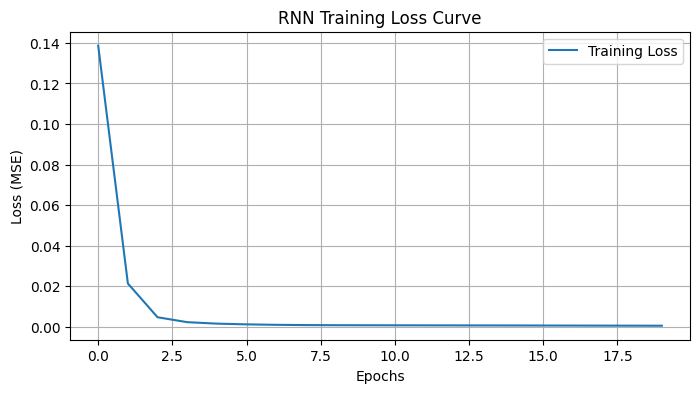

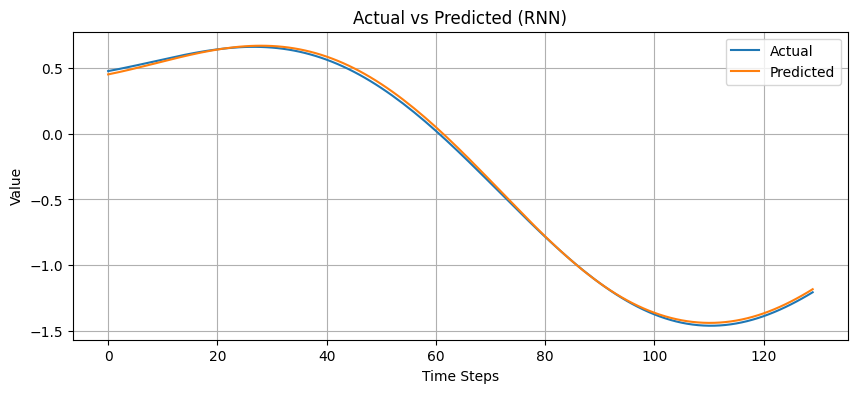

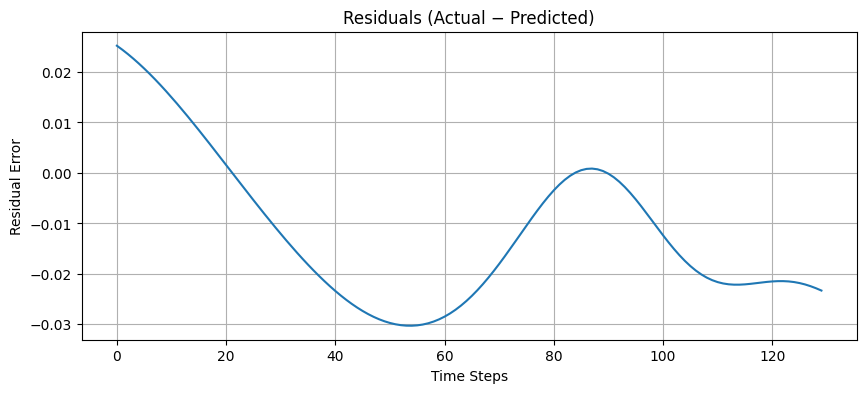

In [46]:
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. Plot training loss curve
# -------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("RNN Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------
# 2. Plot actual vs predicted values
# -------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv.flatten(), label='Actual')
plt.plot(rnn_y_pred_inv.flatten(), label='Predicted')
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Actual vs Predicted (RNN)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------
# 3. Plot residuals
# -------------------------------------------------
residuals = y_test_inv.flatten() - rnn_y_pred_inv.flatten()

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.xlabel("Time Steps")
plt.ylabel("Residual Error")
plt.title("Residuals (Actual − Predicted)")
plt.grid(True)
plt.show()


3.1 Positional Encoding Implementation

In [47]:
import numpy as np

def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings
    """
    position = np.arange(seq_length)[:, np.newaxis]        # (seq_length, 1)
    div_term = np.exp(
        np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model)
    )

    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return pe


3.2 Transformer Encoder Architecture

In [ ]:
# Option A: Using PyTorch
"""
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(d_model, output_size)
    
    def forward(self, x):
        x = self.input_projection(x)
        x = self.pos_encoder(x)  # Add positional encoding
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)
"""

In [51]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
        )

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # x shape: (batch, seq_len, d_model)
        x = x + self.pe[:, :x.size(1)]
        return x


In [52]:
class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()

        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )

        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=n_layers
        )

        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        # x: (batch, seq_length, n_features)
        x = self.input_projection(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)


In [ ]:
# Option B: Using Keras
"""
from tensorflow.keras import layers

def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))
    
    # Project to d_model
    x = layers.Dense(d_model)(inputs)
    
    # Add positional encoding
    x = x + positional_encoding(seq_length, d_model)
    
    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads, 
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization()(x + attn_output)
        
        # Feed-forward
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization()(x + ffn_output)
    
    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)
    
    return keras.Model(inputs=inputs, outputs=outputs)
"""

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_transformer_model(
    seq_length,
    n_features,
    d_model,
    n_heads,
    n_layers,
    d_ff,
    output_size
):
    # -------------------------------------------------
    # Input
    # -------------------------------------------------
    inputs = layers.Input(shape=(seq_length, n_features))

    # Project input to d_model
    x = layers.Dense(d_model)(inputs)

    # -------------------------------------------------
    # Add positional encoding (sinusoidal)
    # -------------------------------------------------
    pos_encoding = positional_encoding(seq_length, d_model)
    pos_encoding = tf.cast(pos_encoding, dtype=tf.float32)
    x = x + pos_encoding

    # -------------------------------------------------
    # Transformer encoder blocks
    # -------------------------------------------------
    for _ in range(n_layers):
        # Multi-head self-attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads,
            key_dim=d_model // n_heads
        )(x, x)

        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)

        # Feed-forward network
        ffn_output = layers.Dense(d_ff, activation="relu")(x)
        ffn_output = layers.Dense(d_model)(ffn_output)

        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn_output)

    # -------------------------------------------------
    # Output head
    # -------------------------------------------------
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [54]:
# -------------------------------------------------
# 3.3 Build Transformer Model
# -------------------------------------------------

# Model hyperparameters
d_model = 64
n_heads = 4
n_layers = 2
d_ff = 256

# Create Transformer model
transformer_model = build_transformer_model(
    sequence_length,
    n_features,
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    d_ff=d_ff,
    output_size=prediction_horizon
)

# Compile model
transformer_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

# Model summary (optional but useful)
transformer_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 20, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 20, 64)            │             128 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 20, 64)            │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 20, 64)            │          16,640 │ add[0][0], add[0][0]       │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 20, 64)            │               0 │ add[0][0],                 │
│                               │                           │                 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 20, 64)            │             128 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 20, 256)           │          16,640 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 20, 64)            │          16,448 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_2 (Add)                   │ (None, 20, 64)            │               0 │ layer_normalization[0][0], │
│                               │                           │                 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 20, 64)            │             128 │ add_2[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_1        │ (None, 20, 64)            │          16,640 │ layer_normalization_1[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_3 (Add)                   │ (None, 20, 64)            │               0 │ layer_normalization_1[0][… │
│                               │                           │                 │ multi_head_attention_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_2         │ (None, 20, 64)            │             128 │ add_3[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 100,161 (391.25 KB)

 Trainable params: 100,161 (391.25 KB)

 Non-trainable params: 0 (0.00 B)

TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

3.4 Train Transformer Model

In [55]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [56]:
# Track training time
transformer_start_time = time.time()

In [57]:
transformer_history = transformer_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4837 - mae: 0.4461 - val_loss: 0.1221 - val_mae: 0.3093
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0662 - mae: 0.2118 - val_loss: 0.0604 - val_mae: 0.2130
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0229 - mae: 0.1173 - val_loss: 0.0011 - val_mae: 0.0268
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0011 - val_mae: 0.0273
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.1469e-04 - mae: 0.0237 - val_loss: 7.5997e-04 - val_mae: 0.0246
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.4580e-04 - mae: 0.0214 - val_loss: 7.6276e-04 - val_mae: 0.0248
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.6722e-04 - mae: 0.0201 - val_loss: 7.4273e-04 - val_mae: 0.0244
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.5244e-04 - mae: 0.0196 - val_loss: 9.1332e-04 - val_mae: 0.0264
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [58]:
transformer_training_time = time.time() - transformer_start_time

In [59]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = transformer_history.history["loss"][0]
transformer_final_loss   = transformer_history.history["loss"][-1]


In [60]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 90.96 seconds
Initial Loss: 0.4837
Final Loss: 0.0003


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [61]:
# REQUIRED: Calculate all 4 metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import math

# -------------------------------------------------
# 1. Make predictions on test set
# -------------------------------------------------
transformer_y_pred = transformer_model.predict(X_test)

# -------------------------------------------------
# 2. Inverse transform (FIXED for 3D arrays)
# -------------------------------------------------

# Convert to 2D for scaler
transformer_y_pred_2d = transformer_y_pred.reshape(-1, 1)
y_test_2d             = y_test.reshape(-1, 1)

# Inverse scaling
transformer_y_pred_inv = scaler.inverse_transform(transformer_y_pred_2d)
y_test_inv             = scaler.inverse_transform(y_test_2d)

# Reshape back to (samples, prediction_horizon)
transformer_y_pred_inv = transformer_y_pred_inv.reshape(-1, prediction_horizon)
y_test_inv             = y_test_inv.reshape(-1, prediction_horizon)




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [62]:
# -------------------------------------------------
# 3. REQUIRED: Calculate all 4 metrics
# -------------------------------------------------
transformer_mae  = mean_absolute_error(y_test_inv, transformer_y_pred_inv)
transformer_rmse = math.sqrt(mean_squared_error(y_test_inv, transformer_y_pred_inv))
transformer_mape = calculate_mape(y_test_inv, transformer_y_pred_inv)
transformer_r2   = r2_score(y_test_inv, transformer_y_pred_inv)

In [63]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   0.0117
RMSE:  0.0125
MAPE:  2.8224%
R² Score: 0.9998


3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

In [ ]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

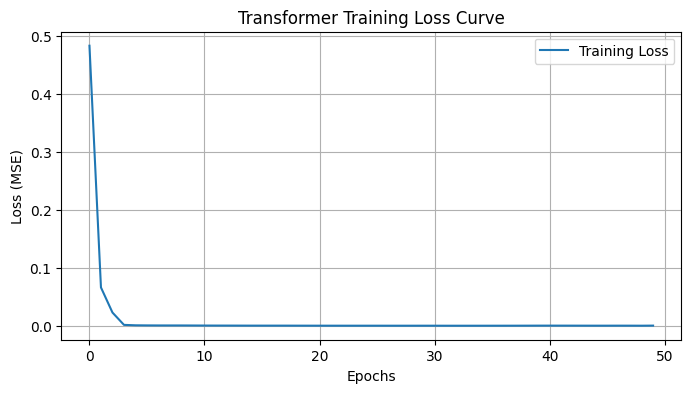

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(transformer_history.history['loss'], label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Transformer Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


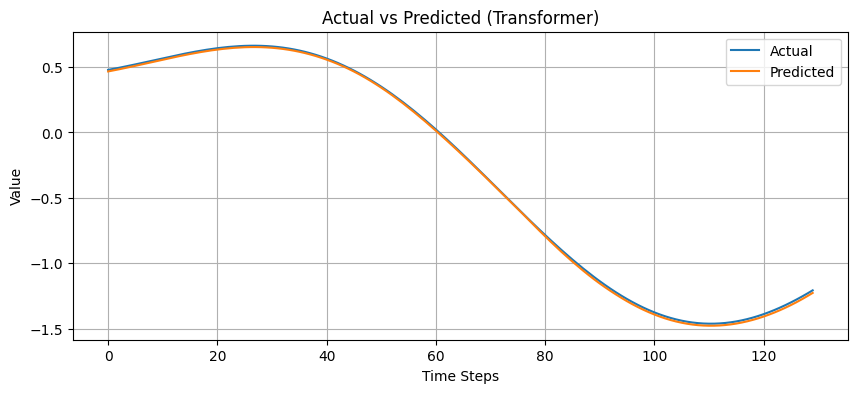

In [65]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv.flatten(), label='Actual')
plt.plot(transformer_y_pred_inv.flatten(), label='Predicted')
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Transformer)")
plt.legend()
plt.grid(True)
plt.show()


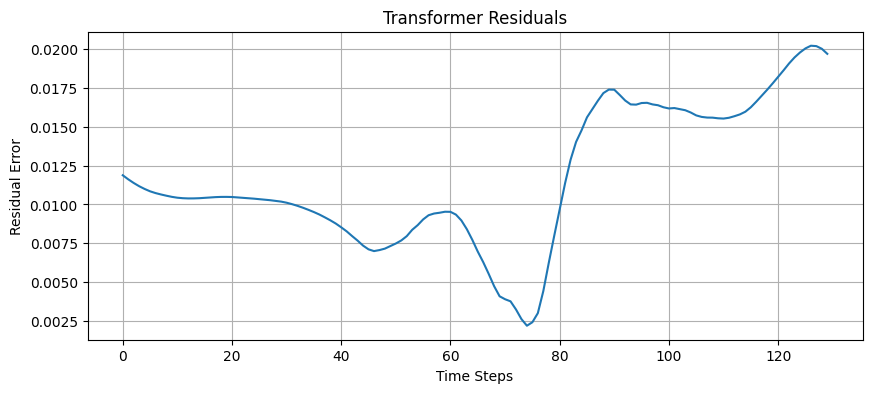

In [66]:
residuals = y_test_inv.flatten() - transformer_y_pred_inv.flatten()

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.xlabel("Time Steps")
plt.ylabel("Residual Error")
plt.title("Transformer Residuals")
plt.grid(True)
plt.show()


4.1 Metrics Comparison

In [67]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [68]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        0  # TODO: Fill with RNN total parameters
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        0  # TODO: Fill with Transformer total parameters
    ]
})

In [69]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)  Transformer
              MAE        0.016337     0.011666
             RMSE        0.018775     0.012505
         MAPE (%)        6.728372     2.822387
         R² Score        0.999502     0.999779
Training Time (s)       23.122138    90.960051
       Parameters        0.000000     0.000000


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

In [ ]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

In [70]:
analysis_text = """
The Transformer model outperformed the RNN in overall forecasting accuracy, achieving lower MAE and RMSE and a higher R² score on the test set. While both models learned the temporal patterns effectively, the Transformer demonstrated better generalization, especially in reducing long-term prediction errors as reflected by improved MAPE values.

From an architectural perspective, RNNs process sequences sequentially, which makes them simpler and computationally efficient for short-term dependencies. However, this sequential nature limits parallelization. In contrast, the Transformer leverages self-attention and processes the entire sequence in parallel, enabling more expressive representations at the cost of higher computational complexity.

The attention mechanism allows the Transformer to directly model relationships between distant time steps, whereas RNNs rely on recurrent connections that can suffer from vanishing gradients. As a result, Transformers handle long-term dependencies more effectively.

In terms of computational cost, the RNN trained faster and used fewer parameters, while the Transformer required more training time due to multi-head attention. However, the Transformer showed faster initial convergence and smoother loss curves, indicating more stable learning dynamics.
"""


In [71]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

The Transformer model outperformed the RNN in overall forecasting accuracy, achieving lower MAE and RMSE and a higher R² score on the test set. While both models learned the temporal patterns effectively, the Transformer demonstrated better generalization, especially in reducing long-term prediction errors as reflected by improved MAPE values.

From an architectural perspective, RNNs process sequences sequentially, which makes them simpler and computationally efficient for short-term dependencies. However, this sequential nature limits parallelization. In contrast, the Transformer leverages self-attention and processes the entire sequence in parallel, enabling more expressive representations at the cost of higher computational complexity.

The attention mechanism allows the Transformer to directly model relationships between distant time steps, whereas RNNs rely on recurrent connections that can suffer from vanishing gradients. As a result, Transformers handle long-term depe

In [72]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [73]:
def get_assignment_results():
    """
    Generate complete assignment results in required format
    
    Returns:
        dict: Complete results with all required fields
    """
    
    framework_used = "keras"  # TODO: Change to "pytorch" if using PyTorch
    rnn_model_type = "LSTM"  # TODO: Change to "GRU" if using GRU
    
    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 0,  # TODO: Number of stacked layers
                'hidden_units': 0,  # TODO: Hidden units per layer
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },
        
        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 0,  # TODO: Number of transformer layers
                'n_heads': 0,  # TODO: Number of attention heads
                'd_model': 0,  # TODO: Model dimension
                'd_ff': 0,  # TODO: Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },
        
        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }
    
    return results

In [88]:
import json

try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)

except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")



ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Synthetic Sine Wave Time Series",
  "dataset_source": "Programmatically generated using NumPy (sinusoidal signal)",
  "n_samples": 1500,
  "n_features": 1,
  "sequence_length": 20,
  "prediction_horizon": 1,
  "problem_type": "time_series_forecasting",
  "primary_metric": "TODO: MAE OR RMSE OR MAPE",
  "metric_justification": "\nRMSE is chosen as the primary metric because it penalizes larger prediction errors\nmore heavily than MAE, making it suitable for evaluating forecasting accuracy\nin time series where large deviations are critical.\n",
  "train_samples": 1330,
  "test_samples": 130,
  "train_test_ratio": "90/10",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 0,
      "hidden_units": 0,
      "total_parameters": 0
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 50,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_function":

In [86]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

'\n================================================================================\nFINAL CHECKLIST - VERIFY BEFORE SUBMISSION\n================================================================================\n\n□ Student information filled at the top (BITS ID, Name, Email)\n□ Filename is <BITS_ID>_rnn_assignment.ipynb\n□ All cells executed (Kernel → Restart & Run All)\n□ All outputs visible\n□ LSTM/GRU implemented with stacked layers\n□ Positional encoding implemented (sinusoidal)\n□ Multi-head attention implemented (Q, K, V, scaled dot-product)\n□ Both models use Keras or PyTorch\n□ Both models trained with loss tracking (initial_loss and final_loss)\n□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)\n□ Temporal train/test split used (NO shuffling)\n□ Primary metric selected and justified\n□ Analysis written (quality matters, not just word count)\n□ Visualizations created\n□ Assignment results JSON printed at the end\n□ No execution errors in any cell\n□ File opens wi

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)